# **PROJECT** **3** **: UNLOCKING YOUTUBE CHANNEL PERFORMANCE SECRETS**


# STEP 1 : IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


# STEP 2 : LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1seEOM0PZrsG_Vi7jVkJcYZ0FewdNUY94")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [ ]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


# STEP 3 : DATA CLEANING

In [ ]:
# Check for missing values

df.isnull().sum()

,0
ID,0
Video Duration,0
Video Publish Time,0
Days Since Publish,0
Day,0
...,...
Watch Time (hours),0
Subscribers,0
Estimated Revenue (USD),0
Impressions,0


In [ ]:
# Convert 'Video Publish Time' to datetime format

df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])


# STEP 4 : FEATURE ENGINEERING

In [ ]:
# Create revenue per view
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

In [ ]:
# Create engagement rate
df['Engagement Rate'] = (
    df['Likes'] + df['Shares'] + df['New Comments']
) / df['Views'] * 100


# STEP 5 : EXPLOARATORY DATA ANALYSIS

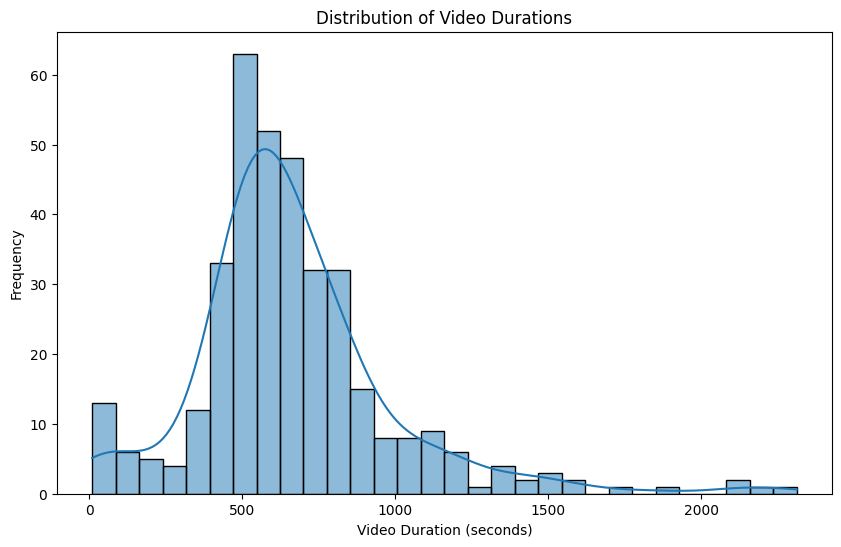

In [ ]:
# Distribution of video durations

plt.figure(figsize=(10, 6))
sns.histplot(df['Video Duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

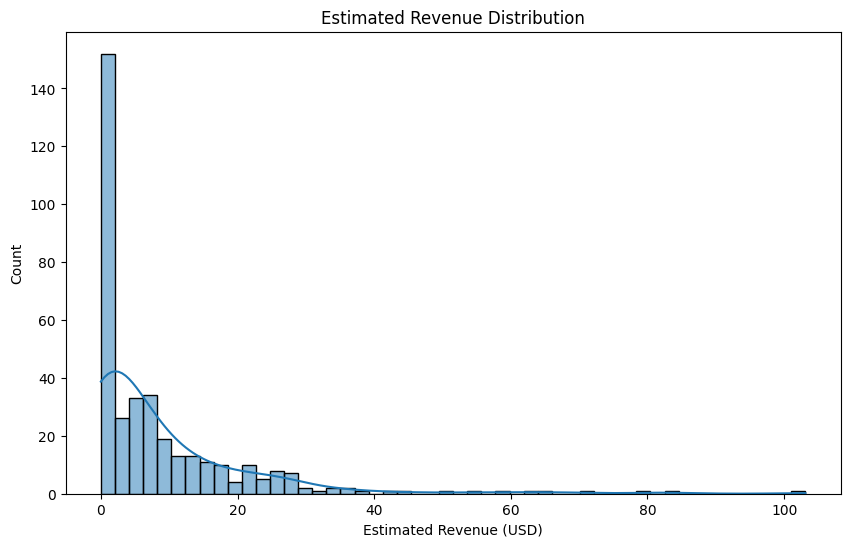

In [ ]:
# Revenue distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=50, kde=True)
plt.title("Estimated Revenue Distribution")
plt.show()



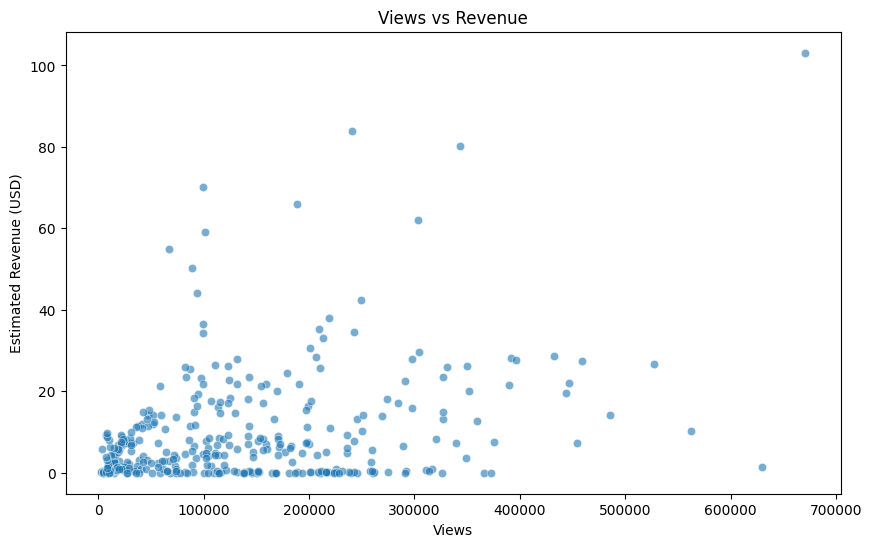

In [ ]:
# Views vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views', y='Estimated Revenue (USD)', data=df, alpha=0.6)
plt.title("Views vs Revenue")
plt.show()


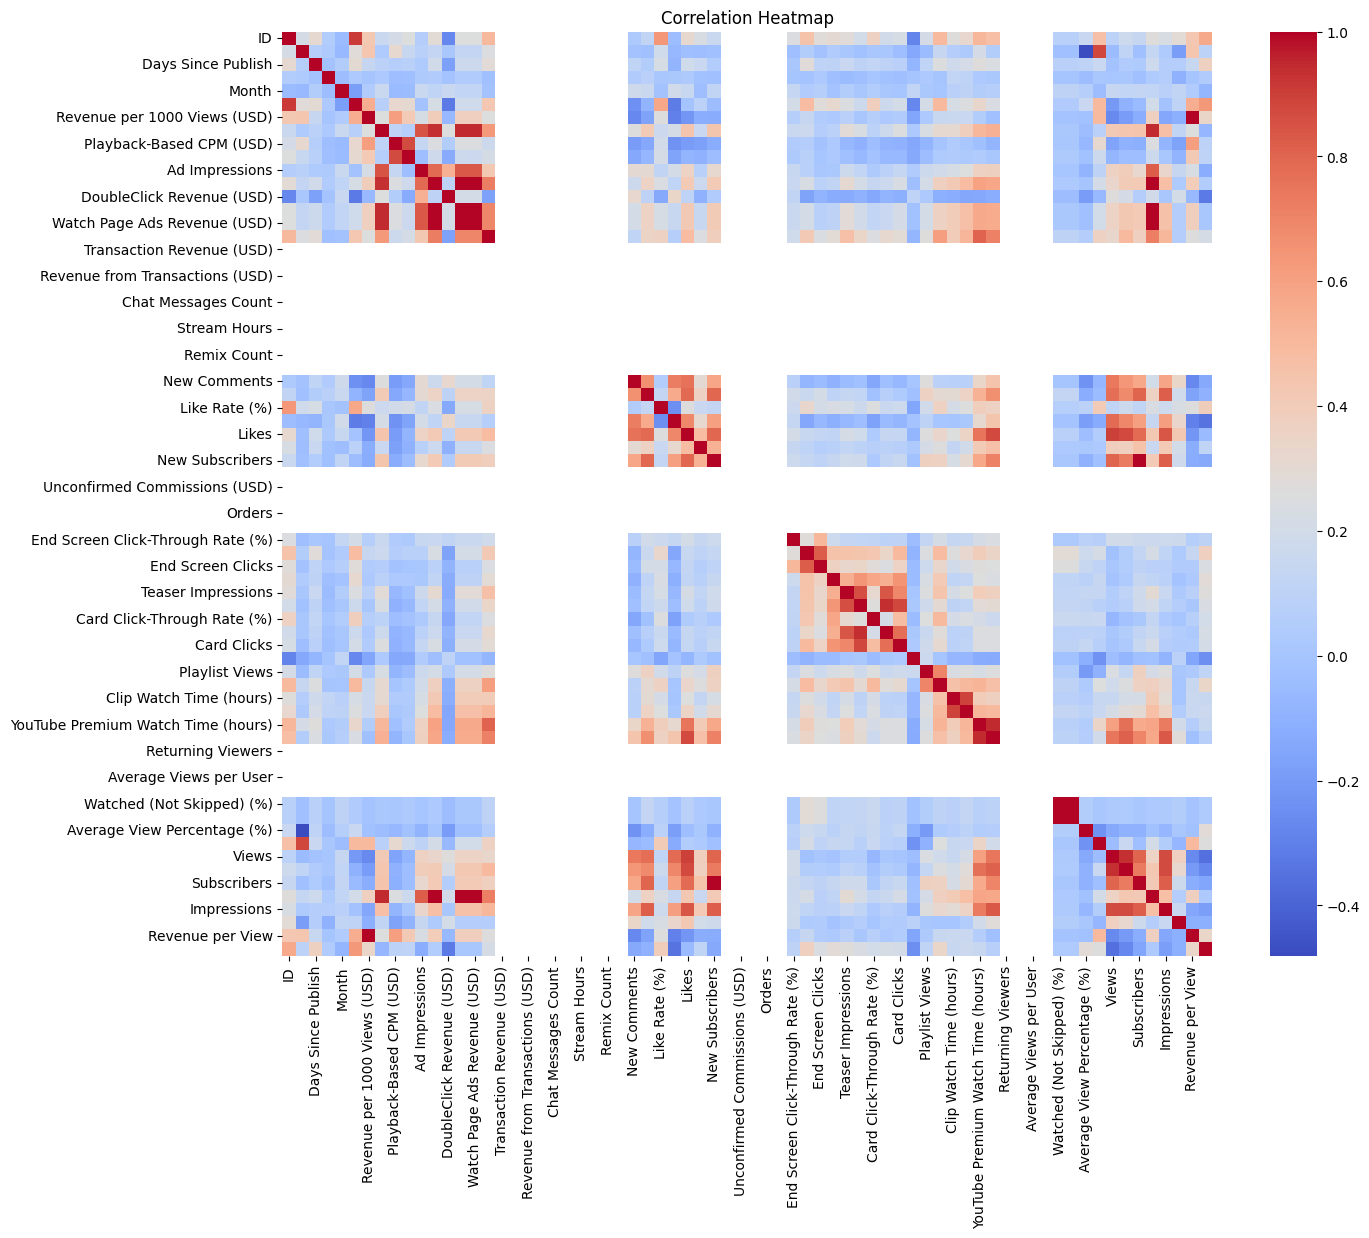

In [ ]:
# Correlation Heatmap

# only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Computing correlation matrix
corr = numeric_df.corr()

# plot
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# STEP 6 : PREDICTIVE MODELLING

In [ ]:
# Defining features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
X = df[features]
y = df['Estimated Revenue (USD)']



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predicting and Evaluating
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 75.70
R-squared Score: 0.13


# STEP 8 : FEATURE IMPORTANCE

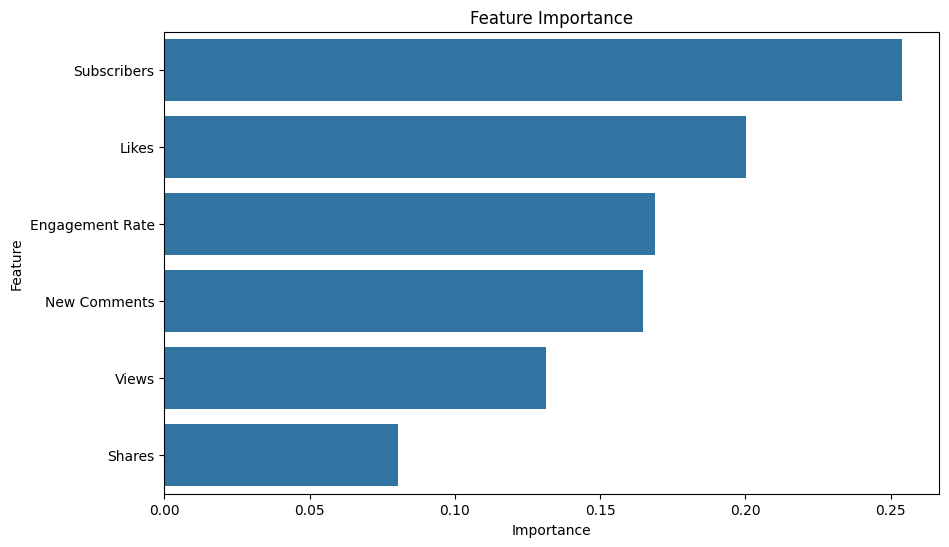

In [ ]:
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()


# STEP 9 : DEPLOY

In [ ]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')


['youtube_revenue_predictor.pkl']